# Cleaning and Preprocessing of the Media Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

## Load the data (with predicted label)

In [2]:
all_media = pd.read_csv('/Users/luke/Desktop/Google Drive/Fall 2019/Capstone/Media Data Analysis/predict/predict1.csv')
all_media.head()

,Unnamed: 0,id,Link,Title,Source,Date,Text
0,0,0.0,https://global-factiva-com.ezproxy.cul.columbi...,Metro\r\nPr. George's police investigate homic...,WP,6 November 2015,b olice investigate homicide 2 car crash injur...
1,1,0.0,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nHolder urges Congress to do more ...,WP,6 November 2015,b es congress to do more on sentencing reform ...
2,2,0.0,https://global-factiva-com.ezproxy.cul.columbi...,"Editorial-Opinion\r\nGuns, knives, common sens...",WP,6 November 2015,b ns knives common sense editorial board 445...
3,3,0.0,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nIndian tribes get access to feder...,WP,6 November 2015,b bes get access to federal crime fighting too...
4,4,0.0,https://global-factiva-com.ezproxy.cul.columbi...,Metro\r\nPolice investigate death of man found...,WP,5 November 2015,b gate death of man found in custody of speci...


## Use only the articles related to police violence on black community (label 1)

In [3]:
valid_media = all_media[all_media['id'] == 1]

In [4]:
valid_media.head()

,Unnamed: 0,id,Link,Title,Source,Date,Text
21,21,1.0,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nA racial 'Rorschach test'\r\nMich...,WP,5 November 2015,b rorschach test michael e miller 1453 words...
45,20,1.0,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nSchool is the surest path to achieving K...,USA,8 April 2008,two things got my attention last week one was...
66,41,1.0,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nObama puts courage ahead of political ex...,USA,25 March 2008,if there is lesson to learn from the speech on...
197,172,1.0,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nBusting the 'code of silence' ; Milwauke...,USA,18 December 2007,the brutal beatings of frank jude and lovell h...
250,225,1.0,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nReservists back in police jobs raise con...,USA,16 November 2007,shortly after wayne williamson returned to tex...


## Drop irrelevant columns

In [5]:
# Drop the first and the second column since they are only the row index and the indicator of label
valid_media = valid_media.drop(columns = ['Unnamed: 0', 'id'])

In [6]:
valid_media = valid_media.reset_index(drop = True)

In [7]:
valid_media.head()

,Link,Title,Source,Date,Text
0,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nA racial 'Rorschach test'\r\nMich...,WP,5 November 2015,b rorschach test michael e miller 1453 words...
1,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nSchool is the surest path to achieving K...,USA,8 April 2008,two things got my attention last week one was...
2,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nObama puts courage ahead of political ex...,USA,25 March 2008,if there is lesson to learn from the speech on...
3,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nBusting the 'code of silence' ; Milwauke...,USA,18 December 2007,the brutal beatings of frank jude and lovell h...
4,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nReservists back in police jobs raise con...,USA,16 November 2007,shortly after wayne williamson returned to tex...


## Standardize data format

In [8]:
wrong_date_index = []
for i in range(valid_media.shape[0]):
    try:
        valid_media.loc[i, 'Date'] = pd.to_datetime(valid_media.loc[i, 'Date'])
    except:
        wrong_date_index.append(i)

In [9]:
valid_media.head()

,Link,Title,Source,Date,Text
0,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nA racial 'Rorschach test'\r\nMich...,WP,2015-11-05 00:00:00,b rorschach test michael e miller 1453 words...
1,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nSchool is the surest path to achieving K...,USA,2008-04-08 00:00:00,two things got my attention last week one was...
2,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nObama puts courage ahead of political ex...,USA,2008-03-25 00:00:00,if there is lesson to learn from the speech on...
3,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nBusting the 'code of silence' ; Milwauke...,USA,2007-12-18 00:00:00,the brutal beatings of frank jude and lovell h...
4,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nReservists back in police jobs raise con...,USA,2007-11-16 00:00:00,shortly after wayne williamson returned to tex...


In [10]:
wrong_date_index

[2099, 2461, 3066]

In [11]:
valid_media.loc[wrong_date_index, :]

,Link,Title,Source,Date,Text
2099,https://global-factiva-com.ezproxy.cul.columbi...,Dallas Police Murders: Activists Tread Fine Li...,WSJ,after clashes at protests,protest groups aiming to highlight police brut...
2461,https://global-factiva-com.ezproxy.cul.columbi...,Key,WSJ,What Happens When Police Officers Wear Body C...,ns when police officers wear body cameras chri...
3066,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nThree,WP,Republicans wrestle with: 'Black Lives Matter',b s republicans wrestle with black lives mat...


In [12]:
# Remove the 3 rows with no valid dates
valid_media = valid_media.drop(wrong_date_index)
valid_media = valid_media.reset_index(drop = True)
valid_media['Date'] = valid_media['Date'].dt.date

In [13]:
valid_media.head()

,Link,Title,Source,Date,Text
0,https://global-factiva-com.ezproxy.cul.columbi...,A-Section\r\nA racial 'Rorschach test'\r\nMich...,WP,2015-11-05,b rorschach test michael e miller 1453 words...
1,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nSchool is the surest path to achieving K...,USA,2008-04-08,two things got my attention last week one was...
2,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nObama puts courage ahead of political ex...,USA,2008-03-25,if there is lesson to learn from the speech on...
3,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nBusting the 'code of silence' ; Milwauke...,USA,2007-12-18,the brutal beatings of frank jude and lovell h...
4,https://global-factiva-com.ezproxy.cul.columbi...,NEWS\nReservists back in police jobs raise con...,USA,2007-11-16,shortly after wayne williamson returned to tex...


## Check text content for WP

In [14]:
WP_index = valid_media.index[valid_media['Source'] == 'WP'].tolist()

In [15]:
valid_media.loc[WP_index[0], 'Text']

'b rorschach test  michael e  miller 1453 words 5 november 2015 the washington post wp final a03 english copyright 2015  the washington post co  all rights reserved university of north texas professor dorothy bland was walking around corinth  her affluent dallas suburb  on oct  24 when she was stopped by police  bland  who is african american  had been exercising in the street  the officers  who are both white  asked her to walk on the opposite side so she could see oncoming traffic or  even better  to use the sidewalk  roughly three minutes later  she was on her way  the short and seemingly simple interaction has proved anything but  however  several days later  bland  who is the dean of unt s mayborn school of journalism  wrote an op ed in the dallas morning news claiming that she had been racially profiled   walking while black is crime in many jurisdictions   she wrote   may god have mercy on our nation   corinth police responded by releasing the officers  dashboard camera video of

#### For contents in WP articles, there are irrelevant information at the beginning of the "Text" column, remove them here.

In [21]:
for index in WP_index:
    position = valid_media.loc[index, 'Text'].find('all rights reserved')
    valid_media.loc[index, 'Text'] = valid_media.loc[index, 'Text'][position+20:]

In [25]:
valid_media.loc[WP_index[3], 'Text']

'with 14 people killed within the first 11 days of july  d c  police chief charles h  ramsey was on solid ground in declaring  crime emergency  tuesday  14 percent rise in robberies over the same period last year also argues forcefully for step up in policing  as this latest surge amply demonstrates  no quadrant of the city is beyond the reach of crime  the emergency declaration will allow the chief to quickly deploy the department s 3 800 officers to crime hot spots or wherever additional patrols and plainclothes police are needed  but will this be enough  the answer is no  as the chief will tell you himself  the d c  police department cannot stop prisons from putting inmates    unskilled  unprepared and jail hardened    back on the streets  as apparently was the case with two of the suspects in the slaying in georgetown early monday morning  thousands of ex offenders return to the district each year  many still reading and performing at the grade school level they had attained when f

#### There are also irrelevant information at the end of some of the WP articles, remove them here.

In [48]:
# find last match of 'http' and remove all characters after that
for index in WP_index:
    match = None
    for match in re.finditer('http', valid_media.loc[index, 'Text']):
        continue
    if match != None:
        match = match.start()
        valid_media.loc[index, 'Text'] = valid_media.loc[index, 'Text'][:match]
            

In [50]:
valid_media.loc[WP_index[2], 'Text']

'police chief charles h  ramsey s latest declaration of  crime emergency  in the district implies that temporary or unexpected situation has arisen when in fact our city s crime problem is nothing new  what is occurring is that after eight years  the policies of this police administration are coming to fruition  instead of fighting crime aggressively in the most violent communities  the metropolitan police department has focused its resources on public relations and in neighborhoods where political influence and money have commanded attention  as result  this administration has gathered praise from the community and media while violent crime has continued unchecked in the city s poorest neighborhoods  the department has failed to develop strategies for reducing crime and encouraging aggressive  effective policing but instead has focused its efforts on instituting disciplinary system that actually discourages proactive policing  indeed  the department has more people assigned to investi

## Check text content for USA

In [51]:
USA_index = valid_media.index[valid_media['Source'] == 'USA'].tolist()

In [71]:
valid_media.loc[USA_index[100], 'Text']

'the amount of surplus military equipment sent to local police departments across the nation has sharply declined despite an executive order president trump signed that was intended to increase those transfers  usa today analysis has found  shipments of gear in the first three months of 2018 fell by half compared with the same period last year  department of defense data show  the amount of armored vehicles  high caliber rifles and other equipment measured by dollar value also slid  trump s executive order  signed last august  rescinded limits imposed on the program by the obama administration after the battlefield style response to the riots in ferguson  mo   in 2014  some police officials said they are approaching the program cautiously despite robust support from trump   if you have long rifle or you have military vehicle  it looks bad   said sgt stephen wells  spokesman for the kern county sheriff s office in california  which ordered about 90 military items from the pentagon in 20

In [68]:
# find last match of 'usa today information' and remove all characters after that
for index in USA_index:
    match = None
    for match in re.finditer('usa today information', valid_media.loc[index, 'Text']):
        continue
    if match != None:
        match = match.start()
        valid_media.loc[index, 'Text'] = valid_media.loc[index, 'Text'][:match]
            

In [72]:
valid_media.loc[USA_index[100], 'Text']

'the amount of surplus military equipment sent to local police departments across the nation has sharply declined despite an executive order president trump signed that was intended to increase those transfers  usa today analysis has found  shipments of gear in the first three months of 2018 fell by half compared with the same period last year  department of defense data show  the amount of armored vehicles  high caliber rifles and other equipment measured by dollar value also slid  trump s executive order  signed last august  rescinded limits imposed on the program by the obama administration after the battlefield style response to the riots in ferguson  mo   in 2014  some police officials said they are approaching the program cautiously despite robust support from trump   if you have long rifle or you have military vehicle  it looks bad   said sgt stephen wells  spokesman for the kern county sheriff s office in california  which ordered about 90 military items from the pentagon in 20

## Check text content for WSJ

In [73]:
WSJ_index = valid_media.index[valid_media['Source'] == 'WSJ'].tolist()

In [82]:
valid_media.loc[WSJ_index[6], 'Text']

'rica police charged in dragging death devon maylie by devon maylie 423 words 2 march 2013 the wall street journal a9 english  copyright  c  2013  dow jones   company  inc   johannesburg    south africa s police watchdog said friday that it arrested eight policemen on charges of murder in connection with the dragging death tuesday of 27 year old mozambican man in police custody that was captured on video  the announcement comes after public uproar over the death of the man  identified by police as taxi driver mido macia  his death came to light on thursday after video taken by bystander    and aired on local television    showed mr  macia being strapped to police van and then dragged down the street  he died in custody several hours later in daveyton  on the outskirts of johannesburg  the eight policemen  who earlier friday were suspended from active duty and disarmed by the country s police commissioner  will appear in the daveyton magistrate s court on monday  said moses dlamini  spo

In [83]:
# find last match of 'license this article' and remove all characters after that
for index in WSJ_index:
    match = None
    for match in re.finditer('license this article', valid_media.loc[index, 'Text']):
        continue
    if match != None:
        match = match.start()
        valid_media.loc[index, 'Text'] = valid_media.loc[index, 'Text'][:match]

In [86]:
valid_media.loc[WSJ_index[100], 'Text']

'chicago    fabiola camacho has steered her life onto different path  and she wants the same for the chicago police department   growing up was kind of always out and being bad and stuff   says the 21 year old  who is pursuing bachelor s degree   i decided wanted to help girls that were in my exact situation   ms  camacho was among dozens of potential recruits    many african american or  like herself  hispanic    at recentopen house held by chicago police as they set out to hire almost thousand officers in response to this year s decades high murder tally  in addition to getting more police on the street  the city s force is trying to remake itself as more diverse to win back support of minority communities  while killings have swelled to over 700 for the first time since the 1990s  police are struggling to solve them  police say this is in part because communities affected by the violence aren t coming forward to help with investigations  nationally  12  of local officers are black  

## Check text content for New York Times

In [87]:
NY_index = valid_media.index[valid_media['Source'] == 'NY'].tolist()

In [92]:
valid_media.loc[NY_index[1], 'Text']

'two fullerton police officers face felony charges in beating in july that left homeless man dead  the orange county district attorney said wednesday  officer manuel ramos was charged with second degree murder and involuntary manslaughter in the beating of kelly thomas  37  drifter with schizophrenia who died five days after the encounter with the police  who were responding to reports of attempted break ins to cars  cpl  jay cicinelli was charged with involuntary manslaughter and excessive use of force  the district attorney  tony rackauckas  said the primary cause of mr  thomas s death was compression of his chest that left him unable to breathe as police officers held him down and beat him  six officers were placed on leave after the beating  but the four others have not been charged  the new york times company document nytf000020110922e79m0005u'

In [93]:
# find last match of 'the new york times company' and remove all characters after that
for index in NY_index:
    match = None
    for match in re.finditer('the new york times company', valid_media.loc[index, 'Text']):
        continue
    if match != None:
        match = match.start()
        valid_media.loc[index, 'Text'] = valid_media.loc[index, 'Text'][:match]

In [94]:
valid_media.loc[NY_index[1], 'Text']

'two fullerton police officers face felony charges in beating in july that left homeless man dead  the orange county district attorney said wednesday  officer manuel ramos was charged with second degree murder and involuntary manslaughter in the beating of kelly thomas  37  drifter with schizophrenia who died five days after the encounter with the police  who were responding to reports of attempted break ins to cars  cpl  jay cicinelli was charged with involuntary manslaughter and excessive use of force  the district attorney  tony rackauckas  said the primary cause of mr  thomas s death was compression of his chest that left him unable to breathe as police officers held him down and beat him  six officers were placed on leave after the beating  but the four others have not been charged  '

## Clean title for every article

In [107]:
wrong_title_index = []
for i in range(valid_media.shape[0]):
    try:
        valid_media.loc[i, 'Title'] = valid_media.loc[i, 'Title'].split('\n')[1].rstrip()
    except:
        wrong_title_index.append(i)

In [108]:
wrong_title_index

[]

In [109]:
valid_media.head()

,Link,Title,Source,Date,Text
0,https://global-factiva-com.ezproxy.cul.columbi...,A racial 'Rorschach test',WP,2015-11-05,university of north texas professor dorothy bl...
1,https://global-factiva-com.ezproxy.cul.columbi...,School is the surest path to achieving King's ...,USA,2008-04-08,two things got my attention last week one was...
2,https://global-factiva-com.ezproxy.cul.columbi...,Obama puts courage ahead of political expediency,USA,2008-03-25,if there is lesson to learn from the speech on...
3,https://global-factiva-com.ezproxy.cul.columbi...,Busting the 'code of silence' ; Milwaukee misc...,USA,2007-12-18,the brutal beatings of frank jude and lovell h...
4,https://global-factiva-com.ezproxy.cul.columbi...,Reservists back in police jobs raise concerns ...,USA,2007-11-16,shortly after wayne williamson returned to tex...


## Save cleaned media data to csv

In [111]:
with open(r"/Users/luke/Desktop/Google Drive/Fall 2019/Capstone/Media Data Analysis/cleaned_media.csv", 'a') as f:
    valid_media.to_csv(f, header=True)

## Check the distribution of articles

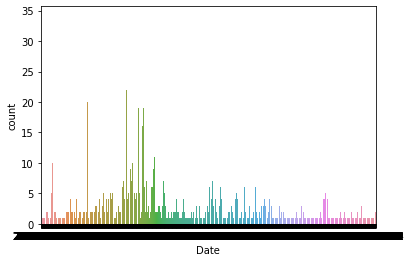

In [84]:
sns.countplot(x = 'Date', data = valid_media)